In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
# Renameing columns
df = df.rename(columns={'Age_08_04': 'Age', 'cc': 'CC'})
# Creating dummy variables for 'Fuel_Type'
df_dummies = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
# Dropping specified columns
df_dummies.drop(columns=['Doors', 'Gears', 'Cylinders', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'], inplace=True)
X = df_dummies[["Age", "KM", "HP", "CC", "Weight"]]
Y = df_dummies["Price"]

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
LR = LinearRegression()
LR.fit(X_train, Y_train)
ypred = LR.predict(X_test)
#Linear Regression
mse = mean_squared_error(Y_test, ypred)
print("Linear Regression Mean Squared Error:", mse.round(3))
rmse = np.sqrt(mse)
print("Linear Regression Root Mean Squared Error:", rmse.round(3))
r2 = r2_score(Y_test, ypred)
print("Linear Regression R-squared:", r2.round(2))
# Statsmodels OLS Models
model = smf.ols('Price ~ Age + KM + HP + CC + Weight', data=df_dummies).fit()
print(model.summary())

Linear Regression Mean Squared Error: 1946945.386
Linear Regression Root Mean Squared Error: 1395.33
Linear Regression R-squared: 0.86
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1785.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:58:07   Log-Likelihood:                -12385.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

In [5]:
#First Model
model = smf.ols('Price ~ Age + HP', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('Age ~ HP', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2880.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:58:11   Log-Likelihood:                -12648.
No. Observations:                1436   AIC:                         2.530e+04
Df Residuals:                    1433   BIC:                         2.532e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.551e+04    341.793     45.367      0.0

In [4]:
#Second Model
model = smf.ols('Price ~Age+KM', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('Age ~ KM ', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.0

In [5]:
#Third Model
model = smf.ols('Price ~ Age + CC', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('Age ~ CC', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2400.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:                -12751.
No. Observations:                1436   AIC:                         2.551e+04
Df Residuals:                    1433   BIC:                         2.552e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.97e+04    235.564     83.631      0.0

In [6]:
#Fourth Model
model = smf.ols('Price ~ Age + Weight', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('Age ~ Weight', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:37:33   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.0

In [7]:
#Fifth Model
model = smf.ols('Price ~ HP + CC', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('HP ~ CC', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     90.81
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           7.39e-38
Time:                        22:37:33   Log-Likelihood:                -13721.
No. Observations:                1436   AIC:                         2.745e+04
Df Residuals:                    1433   BIC:                         2.746e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1538.7581    693.202      2.220      0.0

In [8]:
#Sixth Model
model = smf.ols('Price ~ KM + Weight', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('KM ~ Weight', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1297.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):          2.62e-322
Time:                        22:37:33   Log-Likelihood:                -13065.
No. Observations:                1436   AIC:                         2.614e+04
Df Residuals:                    1433   BIC:                         2.615e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.737e+04   1173.812    -23.321      0.0

In [10]:
#Seventh Model
model = smf.ols('Price ~ CC +HP', data=df_dummies).fit()
print(model.summary())
print("R-squared:", model.rsquared.round(2))
model_vif = smf.ols('CC ~ HP', data=df_dummies).fit()
r2_vif = model_vif.rsquared
VIF = 1 / (1 - r2_vif)
print("VIF VALUE:", VIF.round(4))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     90.81
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           7.39e-38
Time:                        12:24:53   Log-Likelihood:                -13721.
No. Observations:                1436   AIC:                         2.745e+04
Df Residuals:                    1433   BIC:                         2.746e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1538.7581    693.202      2.220      0.0

Text(0.5, 1.0, 'Normal Q-Q plot of Residuals')

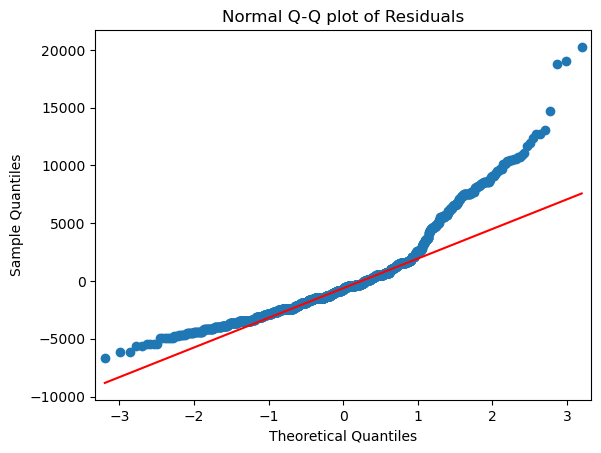

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')#it measures how far off your model's predictions are from the actual data.
plt.title("Normal Q-Q plot of Residuals")
#he Q-Q (Quantile-Quantile) plot is used to check if the residuals of the model are normally distributed.

In [11]:
(cooks,pvalue)=model.get_influence().cooks_distance
cooks

array([5.45178902e-04, 6.33175337e-04, 7.08310469e-04, ...,
       3.05853115e-05, 2.03485261e-04, 5.19581709e-04])

Text(0, 0.5, 'Cooks')

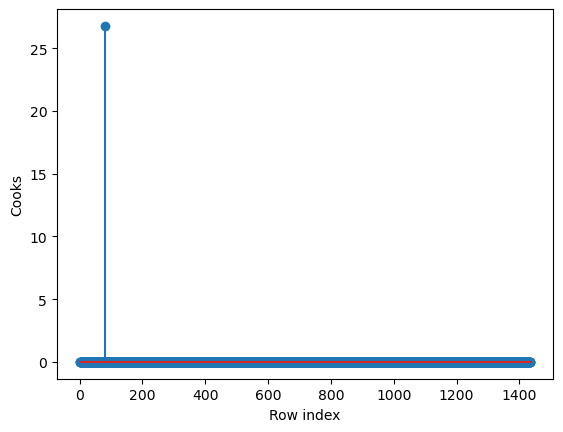

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.subplots(figure=(20,7))
plt.stem(np.arange(len(df_dummies)),np.round(cooks,3))#the x-axis represents the row index of the observations, and the y-axis represents the rounded Cook's Distance values.
plt.xlabel('Row index')
plt.ylabel('Cooks')

In [15]:
k = X.shape[1]  # number of features
n = df_dummies.shape[0]  # number of observations
leverage_cutoff = 3 * ((k + 1) / n)
influential_points = np.where(cooks > leverage_cutoff)[0]
print("Influential Points are:", influential_points)
# Optionally, drop influential points
df_dummies_cleaned = df_dummies.drop(index=influential_points)

Influential Points are: [ 14  15  16  49  53  80 109 110 111 141]


In [17]:
df_dummies.shape

(1436, 6)

In [21]:
model = smf.ols("Price ~Age+HP", data=df_dummies).fit()
print(model.summary())
rsquared = model.rsquared
print("R-squared:", round(rsquared, 2))
mse = np.mean(model.resid**2)
print("Mean Squared Error (MSE):", mse.round(2))
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse.round(3))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2880.
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        08:59:03   Log-Likelihood:                -12648.
No. Observations:                1436   AIC:                         2.530e+04
Df Residuals:                    1433   BIC:                         2.532e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.551e+04    341.793     45.367      0.0

In [23]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, Y_train)
Ypred_ridge = ridge.predict(X_test)
# Evaluating Ridge Regression
mse_ridge = mean_squared_error(Y_test, Ypred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge Regression MSE:", mse_ridge.round(2))
print("Ridge Regression RMSE:", rmse_ridge.round(2))

Ridge Regression MSE: 1946946.08
Ridge Regression RMSE: 1395.33


In [25]:
# Lasso Regression
LS = Lasso(alpha=5.0)
LS.fit(X_train, Y_train)
Ypred_lasso = LS.predict(X_test)
# Evaluating Lasso Regression
LS_mse = mean_squared_error(Y_test, Ypred_lasso)
LS_rmse = np.sqrt(LS_mse)
print("Lasso Regression MSE:", LS_mse.round(2))
print("Lasso Regression RMSE:", LS_rmse.round(2))

Lasso Regression MSE: 1947022.57
Lasso Regression RMSE: 1395.36


In [27]:
LR_df = pd.DataFrame(LR.coef_, index=X.columns, columns=['LinearRegression Coefficients'])
ridge_df = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coefficients'])
LS_df = pd.DataFrame(LS.coef_, index=X.columns, columns=['Lasso Coefficients'])
comparison_df = pd.concat([LR_df, ridge_df, LS_df], axis=1)
print(comparison_df)

        LinearRegression Coefficients  Ridge Coefficients  Lasso Coefficients
Age                       -120.831152         -120.830831         -120.807164
KM                          -0.019491           -0.019491           -0.019501
HP                          29.449715           29.449619           29.422636
CC                          -0.062775           -0.062774           -0.062655
Weight                      18.848810           18.848863           18.851009


Here i focused on the columns Age, KM, HP, CC, and Weight for analysis and modeling because other columns are demonstrated a strong correlation with the target variable (Price). Given their high correlation values, I prioritized these attributes to enhance model performance and reduce the complexity of the model by excluding features with lower relevance to the target variable.

Conclude:

Lasso Regression-has the lowest error (MSE and RMSE), making it the best-performing model for this problem.
Ridge Regression-we know that it performs better than simple linear regression by reducing the error through regularization.
linear Regression- it explains a large portion of the variance (R-squared = 0.8), but it has higher errors compared to the regularized models.

Interview Questions:

1.Normalization and standardization are two common techniques used in data preprocessing to transform data into a standard format, making it easier to analyze and model.

Scales data to a specific range, typically range from 0 to 1.

Centers data around a mean of 0 and scales it to have a standard deviation of 1.

2.Here we used variance inflation factor,for detecting the measure of multicollinerity in a MLR Model.Multicollinerity occurs when two or more independent variables in a model are highly correlated,which make it diffult to determine the individual effect of each varibale on dependent variable.

Interpretation:

     VIF=1:No correlation b/w the independent variable and other variable

     1<VIF<5:Moderate Correlation,but accepted

     VIF>5:High Correlation,which may indicate problamatic multicollinearity
     VIF>10:Strong Multicollinerity